<a href="https://colab.research.google.com/github/anandasuryaa13/Soft-Computing/blob/main/EAS_KL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from shapely.geometry import Polygon, Point
import seaborn as sns
import pandas as pd

In [3]:
# Tentukan koordinat dari sudut-sudut batas non-square boundary berdasarkan gambar yang diunggah
x1, y1 = -5.39, 222.38
x2, y2 = -5.56, -13.27
x3, y3 = 103.75, -14.48
x4, y4 = 247.64, -13.46
x5, y5 = 342.79, 34.9
x6, y6 = 342.79, 59.79
x7, y7 = 254.76, 222.5

In [4]:
boundary = Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6), (x7, y7)])

In [5]:
# Hasilkan data sintetis untuk cluster utama
n_samples = 60000
n_main_clusters = 8  # Jumlah cluster utama
n_subclusters = 13  # Jumlah subcluster dalam setiap cluster utama
random_state = 42

In [6]:
points = []

In [7]:
while len(points) < n_samples:
    x = np.random.uniform(boundary.bounds[0], boundary.bounds[2])
    y = np.random.uniform(boundary.bounds[1], boundary.bounds[3])
    point = (x, y)
    if boundary.contains(Point(point)):
        points.append(point)

points = np.array(points)

In [8]:
# Perform K-means clustering on the main clusters
n_main_clusters = 8
random_state = 42
kmeans_main = KMeans(n_clusters=n_main_clusters, random_state=random_state, n_init=10)
kmeans_main.fit(points)
cluster_labels_main = kmeans_main.labels_

In [9]:
# Generate subclusters within each main cluster
n_subclusters = 13
subclusters_centroid = []
subclusters_label = []
subclusters_points = []
subclusters_centroid_sub_labels = []
subclusters_centroid_main_labels = []
main_labels = []

In [10]:
for i in range(n_main_clusters):
    # Pilih titik-titik yang termasuk dalam cluster utama i
    main_cluster_points = points[cluster_labels_main == i]
    main_cluster_labels = np.repeat(i, len(main_cluster_points))

    # Lakukan K-means clustering pada titik-titik dari cluster utama i
    kmeans_sub = KMeans(n_clusters=n_subclusters, random_state=random_state, n_init=10)
    kmeans_sub.fit(main_cluster_points)
    cluster_labels_sub = kmeans_sub.labels_
    centroids_sub = kmeans_sub.cluster_centers_
    centroid_sub_labels = kmeans_sub.predict(centroids_sub)
    centroid_main_labels = np.repeat(i, len(centroids_sub))

    # Tambahkan titik-titik, label, dan centroid subcluster ke dalam dataset
    subclusters_points.extend(main_cluster_points)
    subclusters_label.extend(cluster_labels_sub)
    main_labels.extend(main_cluster_labels)
    subclusters_centroid.extend(centroids_sub)
    subclusters_centroid_sub_labels.extend(centroid_sub_labels)
    subclusters_centroid_main_labels.extend(centroid_main_labels)

subclusters_label = np.array(subclusters_label)
subclusters_points = np.array(subclusters_points)
main_labels = np.array(main_labels)
subclusters_centroid = np.array(subclusters_centroid)
subclusters_centroid_sub_labels = np.array(subclusters_centroid_sub_labels)
subclusters_centroid_main_labels = np.array(subclusters_centroid_main_labels)

print('Clustering has finished')

Clustering has finished


<ipython-input-11-5fc8578acb23>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')
<ipython-input-11-5fc8578acb23>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1],


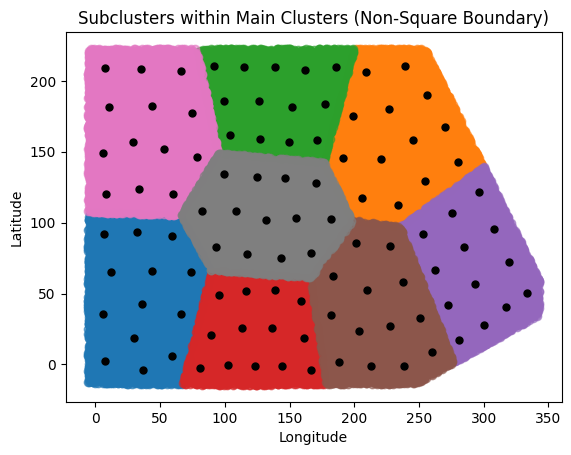

In [11]:
# Define a color map for main clusters
cmap = plt.cm.get_cmap('tab10')

# Plot each main cluster with subclusters
unique_main_labels = np.unique(main_labels)
for i, label in enumerate(unique_main_labels):
    cluster_points = subclusters_points[main_labels == label]
    subcluster_labels = subclusters_label[main_labels == label]
    unique_sub_labels = np.unique(subcluster_labels)
    for j, sub_label in enumerate(unique_sub_labels):
        subcluster_points = cluster_points[subcluster_labels == sub_label]
        plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1],
                    label=f"Main {label} Sub {sub_label}", c=cmap(label), alpha=0.6)

# Plot subcluster centroids
plt.scatter(subclusters_centroid[:, 0], subclusters_centroid[:, 1],
            marker='.', s=100, c='black', label='Subcluster Centroid')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Subclusters within Main Clusters (Non-Square Boundary)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

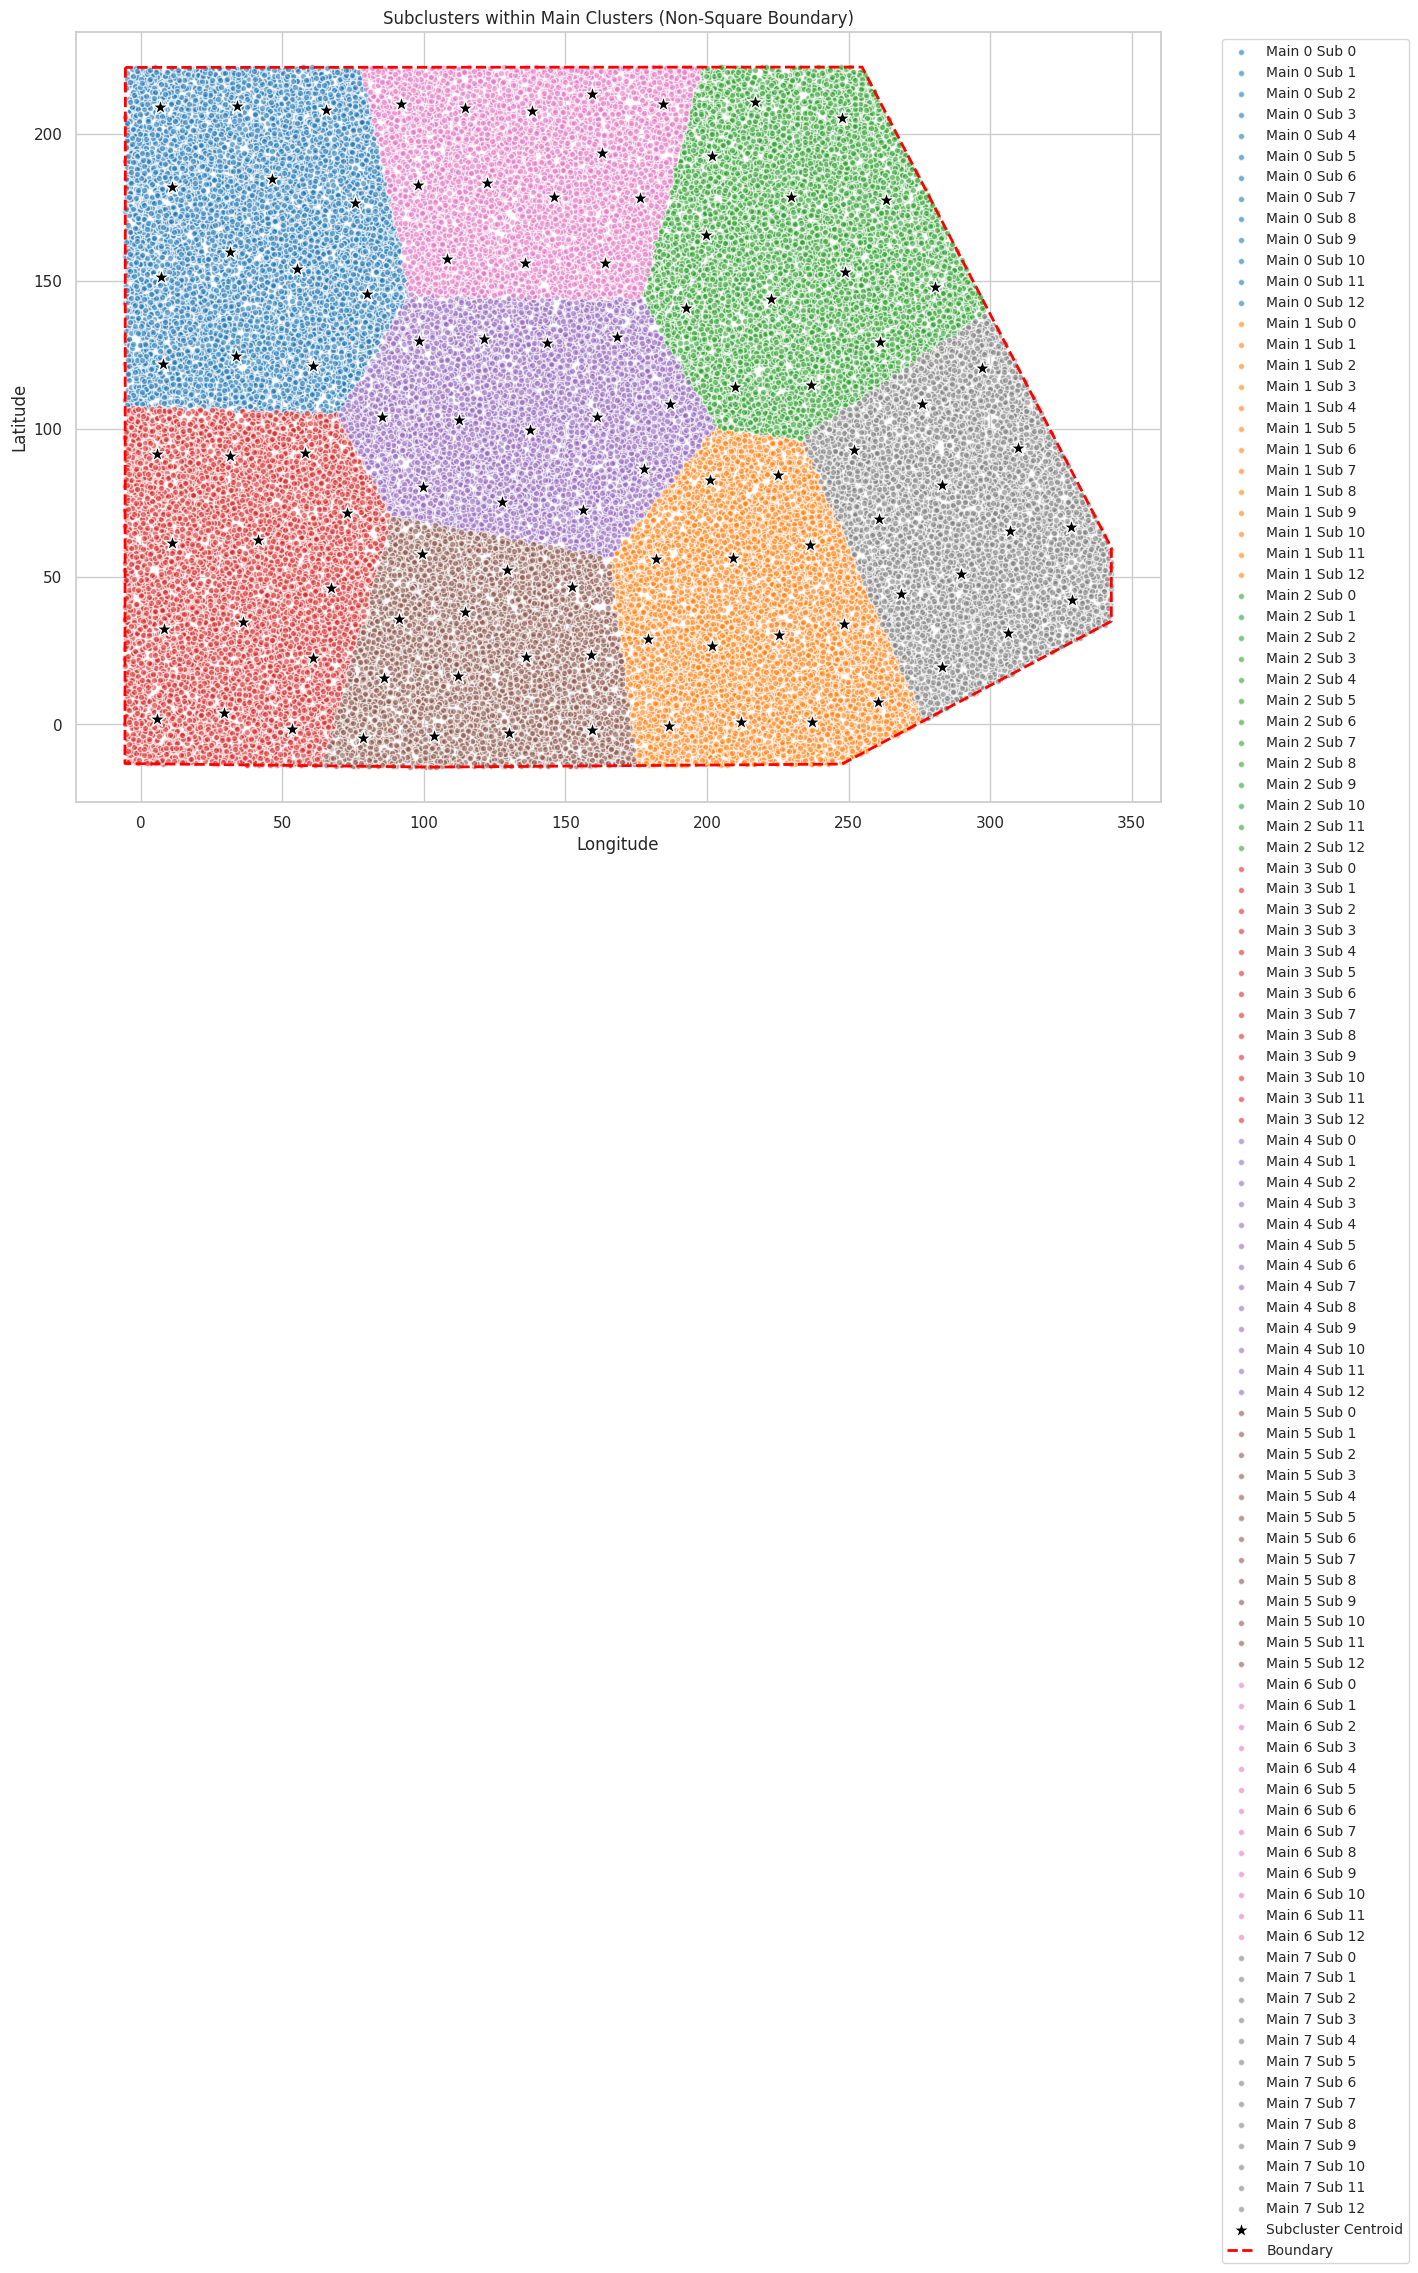

In [ ]:
# Use seaborn for better styling
sns.set(style="whitegrid")

# Create a color palette for the main clusters
palette = sns.color_palette("tab10", n_main_clusters)

# Plot each main cluster with subclusters
plt.figure(figsize=(14, 10))
unique_main_labels = np.unique(main_labels)
for i, label in enumerate(unique_main_labels):
    cluster_points = subclusters_points[main_labels == label]
    subcluster_labels = subclusters_label[main_labels == label]
    unique_sub_labels = np.unique(subcluster_labels)
    for j, sub_label in enumerate(unique_sub_labels):
        subcluster_points = cluster_points[subcluster_labels == sub_label]
        plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1],
                    label=f"Main {label} Sub {sub_label}", c=[palette[label]], alpha=0.6, edgecolor='w', s=20)

# Plot subcluster centroids
plt.scatter(subclusters_centroid[:, 0], subclusters_centroid[:, 1],
            marker='*', s=150, c='black', label='Subcluster Centroid', edgecolor='w')

# Plot boundary
x, y = boundary.exterior.xy
plt.plot(x, y, color='red', linewidth=2, linestyle='--', label='Boundary')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Subclusters within Main Clusters (Non-Square Boundary)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

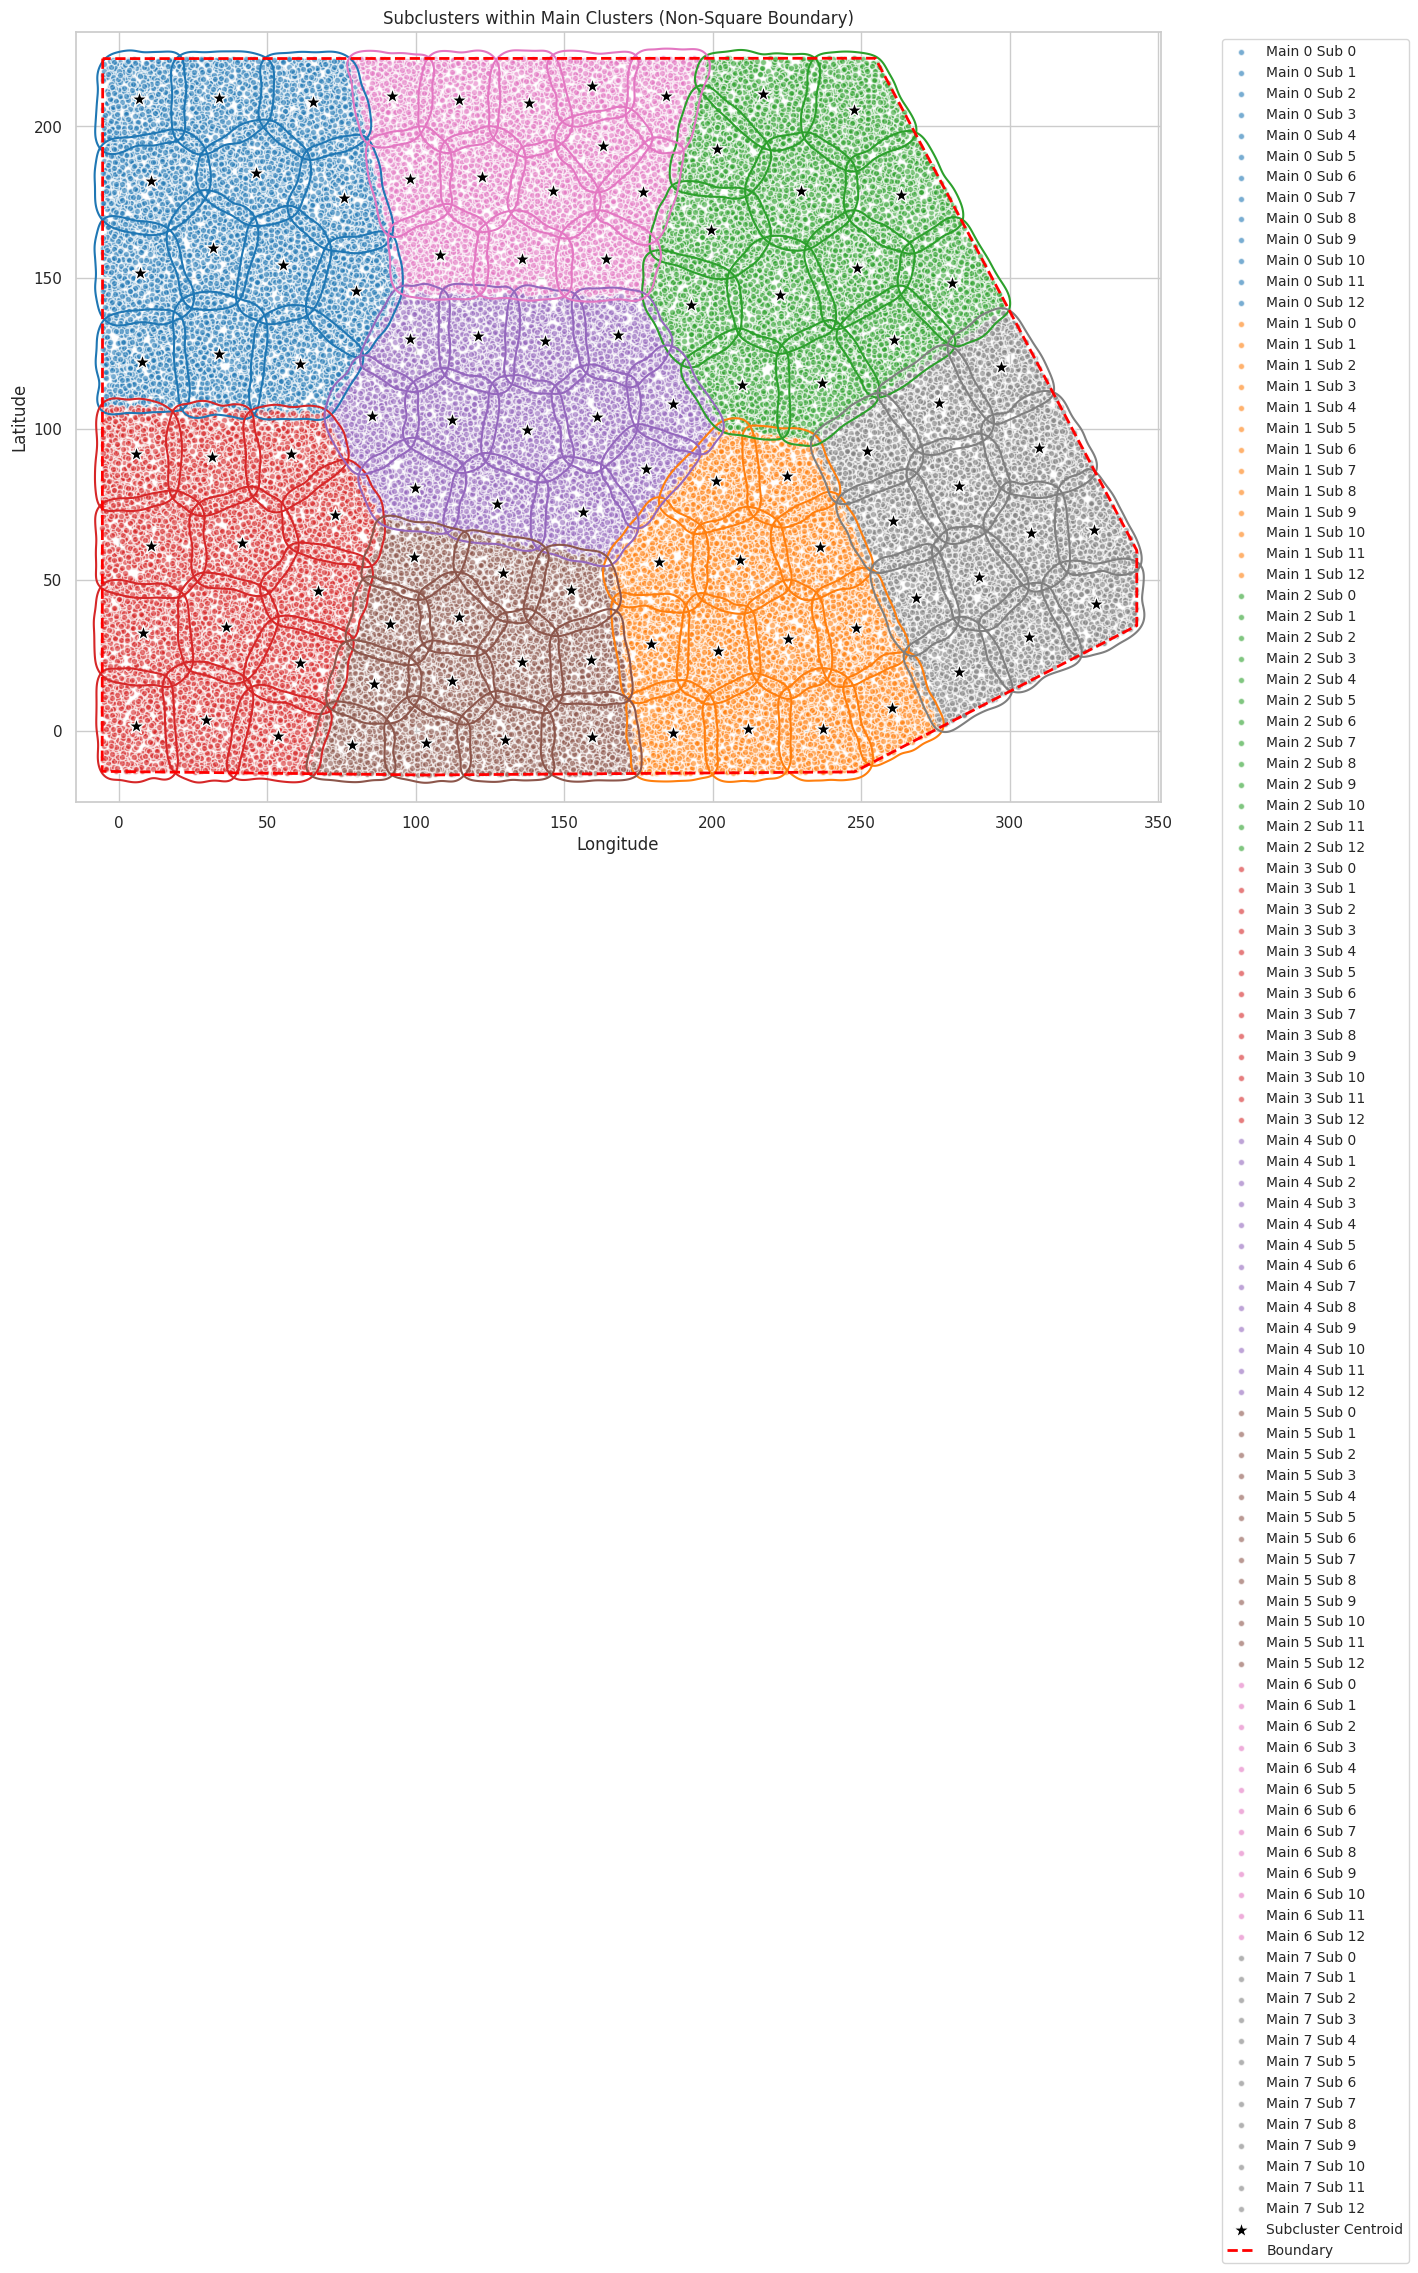

In [ ]:
# Use seaborn for better styling
sns.set(style="whitegrid")

# Create a color palette for the main clusters
palette = sns.color_palette("tab10", n_main_clusters)

# Plot each main cluster with subclusters and borders
plt.figure(figsize=(14, 10))
unique_main_labels = np.unique(main_labels)
for i, label in enumerate(unique_main_labels):
    cluster_points = subclusters_points[main_labels == label]
    subcluster_labels = subclusters_label[main_labels == label]
    unique_sub_labels = np.unique(subcluster_labels)
    for j, sub_label in enumerate(unique_sub_labels):
        subcluster_points = cluster_points[subcluster_labels == sub_label]
        sns.kdeplot(x=subcluster_points[:, 0], y=subcluster_points[:, 1], levels=1, linewidths=1.5, color=palette[label])
        plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1],
                    label=f"Main {label} Sub {sub_label}", c=[palette[label]], alpha=0.6, edgecolor='w', s=20)

# Plot subcluster centroids
plt.scatter(subclusters_centroid[:, 0], subclusters_centroid[:, 1],
            marker='*', s=150, c='black', label='Subcluster Centroid', edgecolor='w')

# Plot boundary
x, y = boundary.exterior.xy
plt.plot(x, y, color='red', linewidth=2, linestyle='--', label='Boundary')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Subclusters within Main Clusters (Non-Square Boundary)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

In [ ]:
subclusters_centroid

array([[ 31.71737524, 159.75444337],
       [  6.96483112, 209.00729738],
       [ 75.76189287, 176.45496991],
       [ 33.90393179, 209.22949282],
       [  7.13585825, 151.37788903],
       [ 55.35776195, 154.03369287],
       [ 33.7490931 , 124.56645204],
       [ 46.21606598, 184.5729419 ],
       [ 65.52010232, 207.96023418],
       [  7.93765439, 121.98861584],
       [ 61.00175858, 121.40038661],
       [ 10.91529766, 181.92362542],
       [ 79.9819411 , 145.62299237],
       [181.92073088,  55.97789292],
       [248.22509751,  33.97782247],
       [211.86110893,   0.65120139],
       [225.04536225,  84.50170737],
       [260.28125806,   7.53238106],
       [209.35951366,  56.44936735],
       [186.68955897,  -0.73456731],
       [201.62767298,  26.62196194],
       [225.39834131,  30.33738187],
       [237.09325087,   0.76268118],
       [236.22283479,  60.82775089],
       [179.20640046,  28.79369392],
       [201.07734141,  82.67697705],
       [261.20795438, 129.38310298],
 

In [ ]:
class Coordinate:
    def __init__(self, x, y, node):
        self.x = x
        self.y = y
        self.node = node

    @staticmethod
    def get_total_distance(coords):
        total_distance = 0
        for i in range(len(coords)):
            total_distance += np.sqrt((coords[i].x - coords[i - 1].x)**2 + (coords[i].y - coords[i - 1].y)**2)
        return total_distance

In [ ]:
if __name__ == '__main__':
    coords = [Coordinate(x, y, i) for i, (x, y) in enumerate(subclusters_centroid)]

    # Initial Plot
    fig = plt.figure(figsize=(20, 14))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for first, second in zip(coords[:-1], coords[1:]):
        ax1.plot([first.x, second.x], [first.y, second.y], 'b')
    ax1.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')

    for c in coords:
        ax1.plot(c.x, c.y, 'ro')
        ax1.annotate(c.node, (c.x, c.y), textcoords="offset points", xytext=(0, 10), ha='center')

    initial_distance = Coordinate.get_total_distance(coords)
    ax1.set_title(f'Initial Total Distance: {initial_distance:.2f} km')

    # Simulated Annealing
    cost0 = Coordinate.get_total_distance(coords)
    T = 140
    factor = 0.99

    for i in range(1000):
        T = T * factor
        for j in range(500):
            r1, r2 = np.random.randint(0, len(coords), size=2)
            coords[r1], coords[r2] = coords[r2], coords[r1]

            cost1 = Coordinate.get_total_distance(coords)
            if cost1 < cost0:
                cost0 = cost1
            else:
                if np.random.uniform() < np.exp((cost0 - cost1) / T):
                    cost0 = cost1
                else:
                    coords[r1], coords[r2] = coords[r2], coords[r1]

    # Final Plot
    for first, second in zip(coords[:-1], coords[1:]):
        ax2.plot([first.x, second.x], [first.y, second.y], 'b')
    ax2.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')

    for c in coords:
        ax2.plot(c.x, c.y, 'ro')
        ax2.annotate(c.node, (c.x, c.y), textcoords="offset points", xytext=(0, 10), ha='center')

    final_distance = Coordinate.get_total_distance(coords)
    ax2.set_title(f'Final Total Distance: {final_distance:.2f} km')

    plt.show()